<a href="https://colab.research.google.com/github/larrymoralez/ML-HW-3/blob/master/ML_HW_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import zipfile
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-19 03:10:24--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  94.0MB/s    in 0.7s    

2019-04-19 03:10:25 (94.0 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

dir = '/tmp/cats_and_dogs_filtered'

train_data = os.path.join(dir, 'train')
val_data = os.path.join(dir, 'validation')

train_cats = os.path.join(train_data, 'cats')
train_dogs = os.path.join(train_data, 'dogs')
val_cats = os.path.join(val_data, 'cats')
val_dogs = os.path.join(val_data, 'dogs')

In [26]:
conv_base = VGG19(weights = 'imagenet',
              include_top=False, 
              input_shape=(150, 150, 3))

#conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#model.summary()

In [28]:
train_data_gen = ImageDataGenerator(
  featurewise_center = False,
  samplewise_center = False,
  featurewise_std_normalization = False,
  samplewise_std_normalization = False,
  rotation_range = 90,
  horizontal_flip = True,
  vertical_flip = True)

train_gen = train_data_gen.flow_from_directory(train_data, target_size = (150, 150), batch_size = 20, class_mode = 'binary')

val_data_gen = ImageDataGenerator(rescale=1./255)

val_gen = val_data_gen.flow_from_directory(val_data, target_size = (150, 150), batch_size = 20, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if layer.name == 'block5_conv4':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [30]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-5), metrics=['acc'])

#had to limit steps and epochs due to consistant runtime errors in Collab
history = model.fit_generator(
    train_gen,
    steps_per_epoch=25,
    epochs=20,
    validation_data=val_gen,
    validation_steps=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
25/25 [==============================] - 492s 20s/step - loss: 3.1378 - acc: 0.6060 - val_loss: 0.6996 - val_acc: 0.5300
Epoch 2/20
25/25 [==============================] - 491s 20s/step - loss: 2.3880 - acc: 0.6540 - val_loss: 0.6762 - val_acc: 0.5100
Epoch 3/20
25/25 [==============================] - 487s 19s/step - loss: 1.9416 - acc: 0.6740 - val_loss: 0.6479 - val_acc: 0.5750
Epoch 4/20
25/25 [==============================] - 484s 19s/step - loss: 1.4272 - acc: 0.7320 - val_loss: 0.6694 - val_acc: 0.5600
Epoch 5/20
25/25 [==============================] - 488s 20s/step - loss: 1.3565 - acc: 0.6980 - val_loss: 0.6471 - val_acc: 0.6100
Epoch 6/20
25/25 [==============================] - 491s 20s/step - loss: 1.1861 - acc: 0.7360 - val_loss: 0.6522 - val_acc: 0.6200
Epoch 7/20
25/25 [==============================] - 490s 20s/step - loss: 1.0196 - acc: 0.7400 - val_loss: 0.6648 - val_acc: 0.5500
Epoch 8/20
25/25 [==========

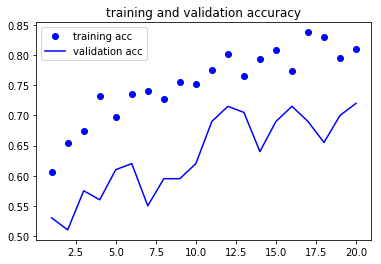

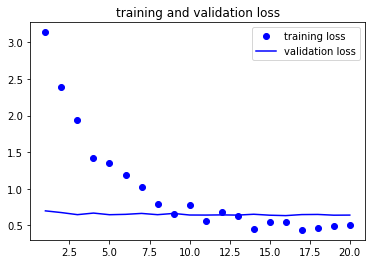

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

In [33]:
val_loss, val_acc = model.evaluate_generator(val_gen, steps=50)

print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

Validation loss: 0.6486058580875397
Validation accuracy: 0.6869999992847443
